In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 50

In [2]:
df = pd.read_csv("./data/2015.csv").sample(100000, random_state = RANDOM_SEED)

In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,b'05192015',b'05',b'19',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,b'09232015',b'09',b'23',b'2015',1100.0,2.015005e+09,2.015005e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,b'11052015',b'11',b'05',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,b'05112015',b'05',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(100000, 330)

In [5]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [6]:
df.select_dtypes(exclude='number').count()

IDATE       100000
IMONTH      100000
IDAY        100000
IYEAR       100000
PCDMDECN    100000
EXACTOT1    100000
EXACTOT2    100000
dtype: int64

In [8]:
# Take numeric features
df1 = df.select_dtypes('number')
df1.shape

(100000, 323)

In [9]:
df1['_RFHLTH'].value_counts()

1.0    81140
2.0    18579
9.0      281
Name: _RFHLTH, dtype: int64

In [10]:
# We care about labels 1 and 2. Rename 2 to 0
df2 = df1.loc[df1['_RFHLTH'].isin([1,2])]

# Replace 2 to 0
df2['_RFHLTH'] = df2['_RFHLTH'].replace({2:0})

# Rename _RFHLTH tolabel
df3 = df2.rename(columns= {"_RFHLTH": "label"})

<ipython-input-10-a9b8c5c58c24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['_RFHLTH'] = df2['_RFHLTH'].replace({2:0})


In [11]:
df3['label'].value_counts()

1.0    81140
0.0    18579
Name: label, dtype: int64

In [13]:
# Remove these columns. They are different versions of the label columns
drop_columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH']

df3.drop(drop_columns, axis=1,  inplace=True)

In [14]:
df3.shape

(99719, 314)

In [15]:
# Separate features and labels
df_labels = df3.pop('label')

In [16]:
df_labels.head(10)

383119    1.0
55536     1.0
267093    1.0
319092    1.0
420978    1.0
304768    1.0
277806    1.0
8154      1.0
318310    1.0
82922     0.0
Name: label, dtype: float64

In [17]:
df3.shape

(99719, 313)

In [27]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3, df_labels, random_state = RANDOM_SEED, stratify = df_labels, test_size= 0.3)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69803, 313), (29916, 313), (69803,), (29916,))

In [30]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [31]:
# First Evaluate with a decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
train_predict_proba = tree.predict_proba(X_train)[:,1]
train_preds = tree.predict(X_train)

test_predict_proba = tree.predict_proba(X_test)[:,1]
test_preds = tree.predict(X_test)

In [38]:
# Check the ROC_AUC for train and test wrt to baseline

from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

roc_auc_score_train = roc_auc_score(y_train, train_predict_probs)
roc_auc_score_test = roc_auc_score(y_test, test_predict_probs)

print(f"Train ROC AUC score:{roc_auc_score_train}")
print(f"Test ROC AUC score:{roc_auc_score_test}")

roc_auc_score_baseline_test = roc_auc_score(y_test, [1 for _ in range(len(y_test))])
print(f"Test ROC AUC Baseline score:{roc_auc_score_baseline_test}")


Train ROC AUC score:1.0
Test ROC AUC score:0.6673195668222272
Test ROC AUC Baseline score:0.5


In [ ]:
# The above results show that there is an overfit on training data

Metric:  precision_score
Baseline: 0.813678299237866
Train: 1.0
Test: 0.8788255998626433


Metric:  recall_score
Baseline: 1.0
Train: 1.0
Test: 0.8410976912332594


Metric:  roc_auc_score
Baseline: 0.5
Train: 1.0
Test: 0.6673195668222272




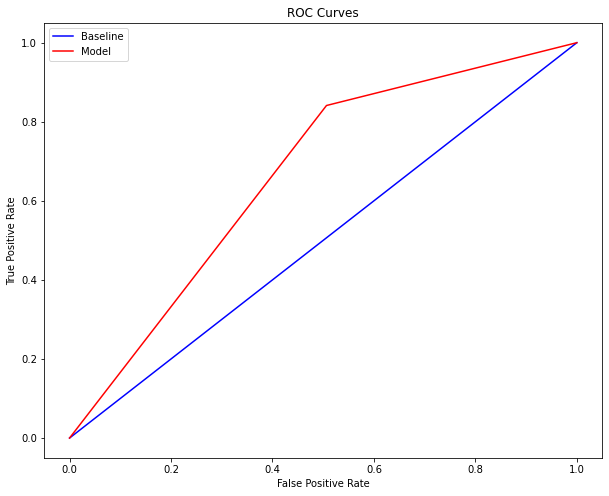

In [48]:
# Helper function that can capture various classification metrics for a given model
# And plot the roc curve

def evaluate_model(train_labels, 
                   train_preds, 
                   train_preds_proba,
                   test_labels,
                   test_preds, 
                   test_preds_proba):
    
    # Note : We calculate baseline for test, not train
    baseline = {}
    baseline['precision_score'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['recall_score'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc_auc_score'] = roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])
    
    train = {}
    train['precision_score'] = precision_score(train_labels, train_preds)
    train['recall_score'] = recall_score(train_labels, train_preds)
    train['roc_auc_score'] = roc_auc_score(train_labels, train_preds_proba)
    
    test = {}
    test['precision_score'] = precision_score(test_labels, test_preds)
    test['recall_score'] = recall_score(test_labels, test_preds)
    test['roc_auc_score'] = roc_auc_score(test_labels, test_preds_proba)
    
    for metric in ['precision_score', 'recall_score', 'roc_auc_score']:
        print("Metric: ", metric)
        print(f"Baseline: {baseline[metric]}")
        print(f"Train: {train[metric]}")
        print(f"Test: {test[metric]}")
        print("\n")
    
    fpr_baseline, tpr_baseline, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    fpr_test, tpr_test, _ = roc_curve(test_labels, test_preds_proba)
    
    
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr_baseline, tpr_baseline, 'b', label='Baseline')
    plt.plot(fpr_test,tpr_test,'r', label='Model')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curves")
    plt.show()
    

evaluate_model(y_train, train_preds,train_predict_proba, y_test, test_preds, test_predict_proba)
    

In [52]:
# Print confusion matrix
confusion_matrix
(y_test, test_preds)


array([[ 2751,  2823],
       [ 3868, 20474]], dtype=int64)

In [56]:
# Check feature  importance
df_feature_imp = pd.DataFrame({
    'features': list(df3.columns),
    'importance': tree.feature_importances_
    }
).sort_values('importance', ascending=False)
df_feature_imp.head(10)

,features,importance
62,DIFFWALK,0.191710
58,QLACTLM2,0.030489
51,EMPLOY1,0.023576
64,DIFFALON,0.018319
245,_BMI5,0.015507
54,INTERNET,0.015410
226,_MICHD,0.014064
221,_LLCPWT,0.013081
212,_STRWT,0.013019
41,DIABETE3,0.012920


In [57]:
# Evaluate the same model using RandomForest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators = 100,
    max_features = 'sqrt',
    random_state = RANDOM_SEED
)

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [60]:
rfc_train_preds = rfc.predict(X_train)
rfc_train_preds_proba = rfc.predict_proba(X_train)[:,1]

rfc_test_preds = rfc.predict(X_test)
rfc_test_preds_proba = rfc.predict_proba(X_test)[:,1]

print(rfc_train_preds,rfc_train_preds_proba, rfc_test_preds,rfc_test_preds_proba)

[1. 1. 0. ... 1. 1. 1.] [1.   1.   0.14 ... 1.   0.96 0.96] [1. 1. 1. ... 1. 1. 1.] [0.95 0.98 0.85 ... 0.98 0.67 1.  ]


Metric:  precision_score
Baseline: 0.813678299237866
Train: 0.9999647887323944
Test: 0.8813693966332514


Metric:  recall_score
Baseline: 1.0
Train: 1.0
Test: 0.9571522471448525


Metric:  roc_auc_score
Baseline: 0.5
Train: 1.0
Test: 0.8713709749100081




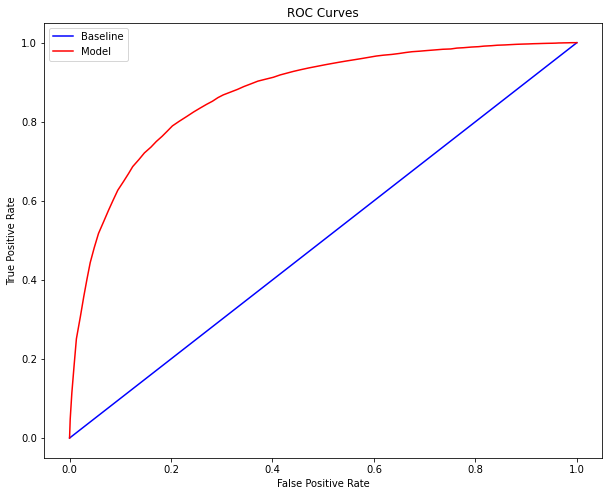

In [61]:
evaluate_model(y_train,rfc_train_preds,rfc_train_preds_proba, y_test, rfc_test_preds, rfc_test_preds_proba )

In [63]:
confusion_matrix(y_test, rfc_test_preds)

array([[ 2438,  3136],
       [ 1043, 23299]], dtype=int64)

In [66]:
df_feature_imp_rfc = pd.DataFrame({
    'features' : list(df3.columns),
    'Importance': rfc.feature_importances_
}).sort_values('Importance', ascending = False)

df_feature_imp_rfc.head(10)

,features,Importance
62,DIFFWALK,0.036200
58,QLACTLM2,0.030694
51,EMPLOY1,0.024156
64,DIFFALON,0.022699
59,USEEQUIP,0.016922
61,DECIDE,0.016271
307,_LMTSCL1,0.013424
53,INCOME2,0.011929
37,CHCCOPD1,0.011506
245,_BMI5,0.011497


In [68]:
# Optimization of RFC
from sklearn.model_selection import RandomizedSearchCV

params ={
    # linspace in this case means we try 500 trees in the range 10 to 50
    'n_estimators' : np.linspace(10,50,500).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False] # Use bootstrapped dataset or not
}

model = RandomForestClassifier(random_state = RANDOM_SEED)

rsv = RandomizedSearchCV(
    model,
    params,
    n_jobs=-1,  # -1 means run all processes in parallel
    n_iter = 10, # number of parameter settings sampled
    cv = 3,
    random_state = RANDOM_SEED
)

# Fit
rsv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [69]:
# Find the best params
rsv.best_params_


{'n_estimators': 42,
 'min_samples_split': 5,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 7,
 'bootstrap': True}

In [70]:
# Find the best model
best_model = rsv.best_estimator_

# Run Predictions
best_model_train_preds = best_model.predict(X_train)
best_model_train_preds_proba = best_model.predict_proba(X_train)[:,-1]

best_model_test_preds = best_model.predict(X_test)
best_model_test_preds_proba = best_model.predict_proba(X_test)[:,-1]



Metric:  precision_score
Baseline: 0.813678299237866
Train: 0.8854873978593624
Test: 0.8852446394887785


Metric:  recall_score
Baseline: 1.0
Train: 0.948237614000493
Test: 0.944704625749733


Metric:  roc_auc_score
Baseline: 0.5
Train: 0.8667235509088583
Test: 0.8577437634684104




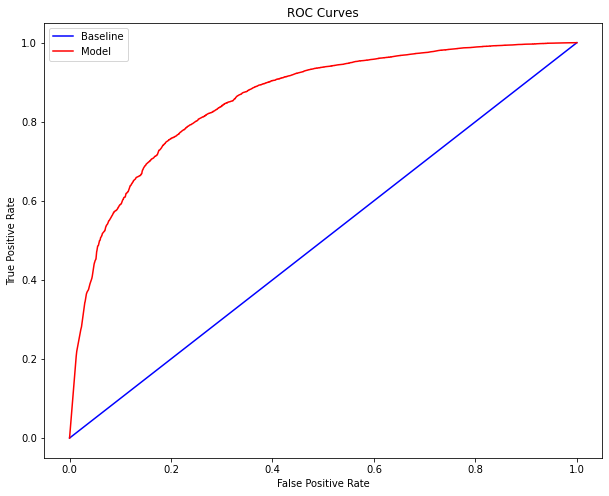

In [71]:
evaluate_model(y_train, 
               best_model_train_preds, 
               best_model_train_preds_proba,
               y_test,
               best_model_test_preds,
               best_model_test_preds_proba
              )